**Author : Utkarsha Sathe**

**Task 3: Exploratory Data Analysis-Retail**



In [ ]:
#Importing all the libraries used in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

**Step 1: Reading the Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
## load from google drive
file_path = 'gdrive/My Drive/Colab Notebooks/SampleSuperstore.csv'

Mounted at /content/gdrive


In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/SampleSuperstore.csv')


In [ ]:
#Load first five rows of dataset
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Load last five rows of dataset
sample.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
#Number of elements in each dimension of array
sample.shape

(9994, 13)

**Step 2: Checking for the data's information i.e type**

In [ ]:
#Returns the concise summary of the dataset
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Gives the statistical data
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Check the missing values
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Step 3: Checking for the duplicate data. If yes, dropping those data.**

In [ ]:
#Check the duplicated data
sample.duplicated().sum()

17

In [ ]:
sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#Displays the unique data
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Step 4 : Dropping irrelevant columns**

In [ ]:
#Deleting the column
col =['Postal Code']
sample1= sample.drop(columns=col,axis=1)

**Step 5 :Checking Statistical relation between the various rows and columns**

In [ ]:
#Correlation between variables
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [ ]:
#Covariance of columns
sample1.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [ ]:
#Loads first five rows
sample1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Loads last five rows
sample1.tail()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


**Step 6 : Data Visualisation**

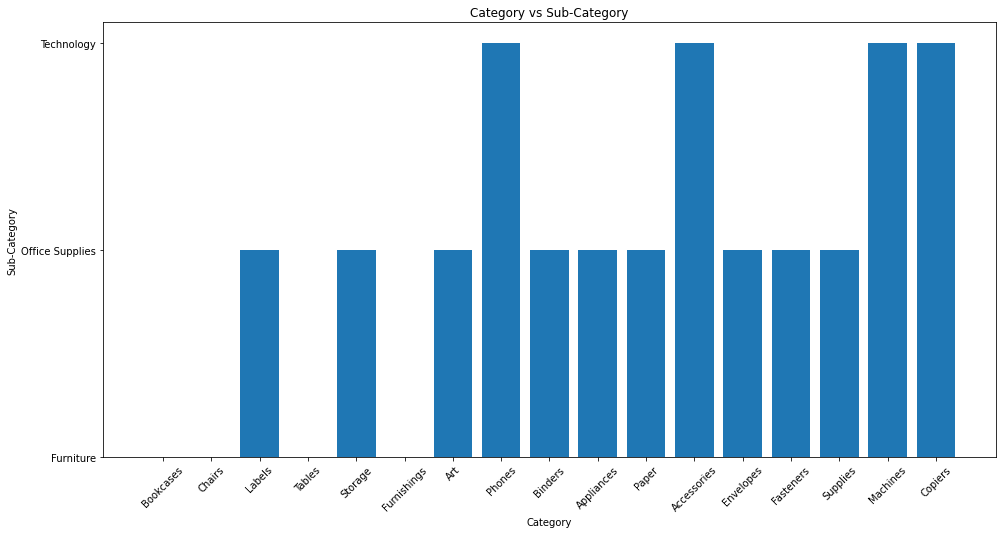

In [ ]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=sample1)
plt.title('Category vs Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Checking the correlation
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


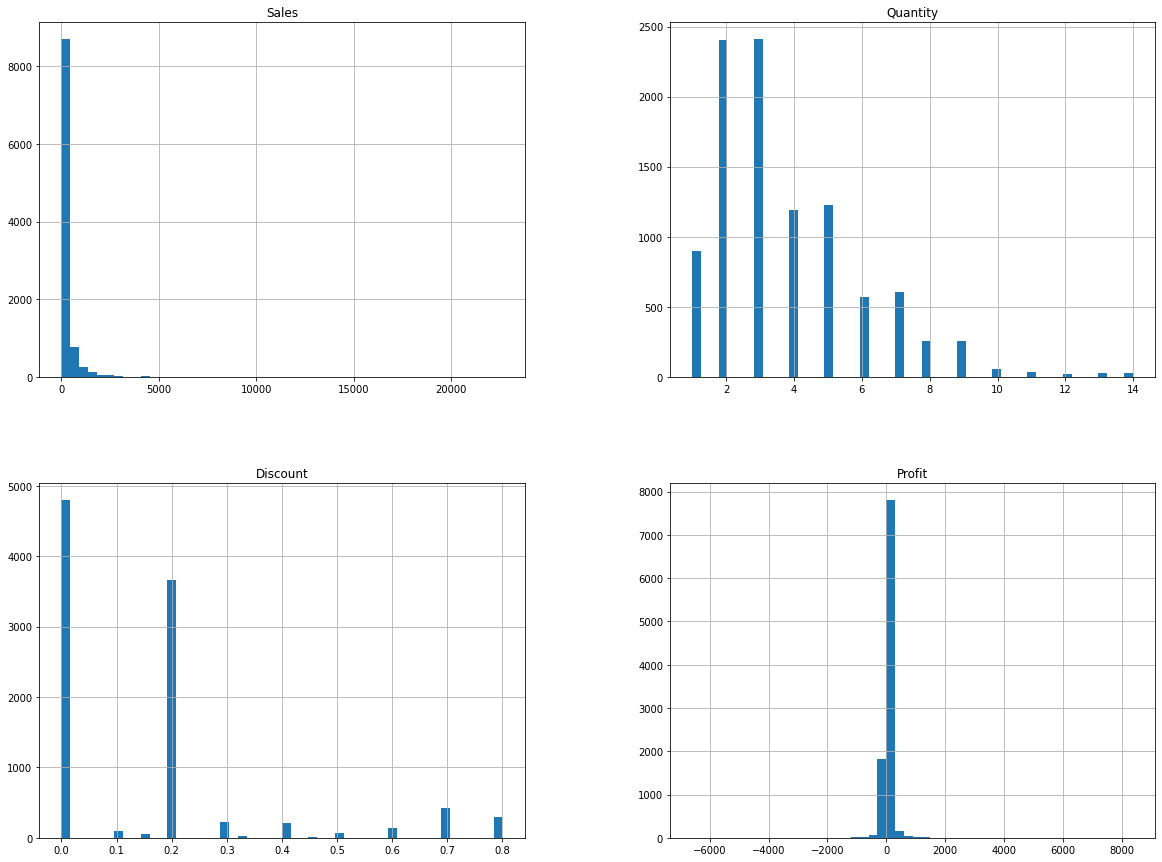

In [ ]:
sample1.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#Count the total relatable states
sample1['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

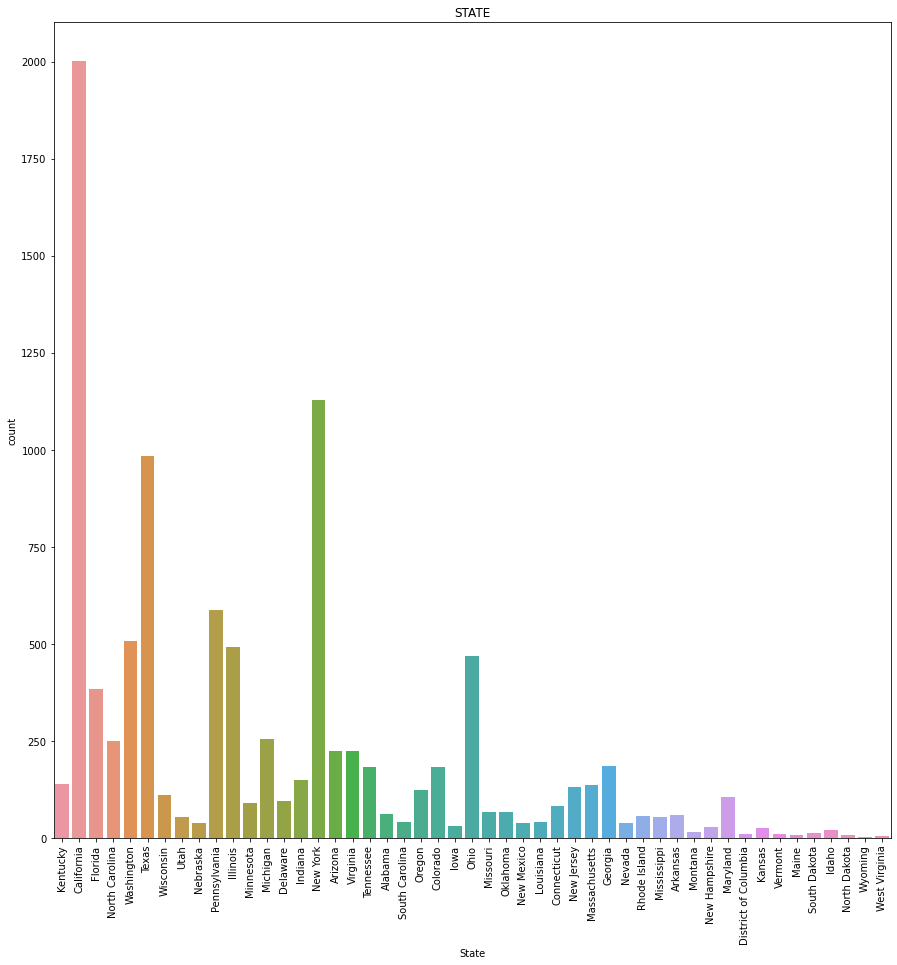

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=sample1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

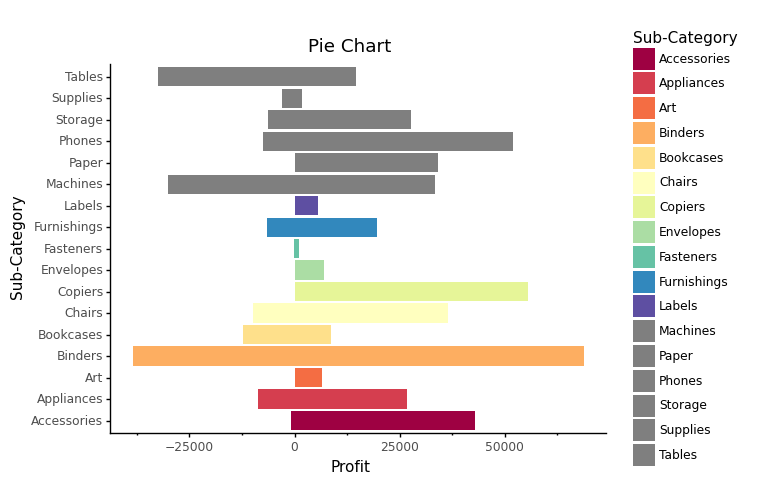

<ggplot: (8731169475185)>

In [ ]:
Profit_plot = (ggplot(sample,aes(x='Sub-Category',y='Profit',fill='Sub-Category')) + geom_col() + coord_flip() + scale_fill_brewer(type='div',palette="Spectral") + theme_classic() + ggtitle('Pie Chart')) 
display(Profit_plot)

**The above pie chart shows the profit and loss of each and every subcategories**



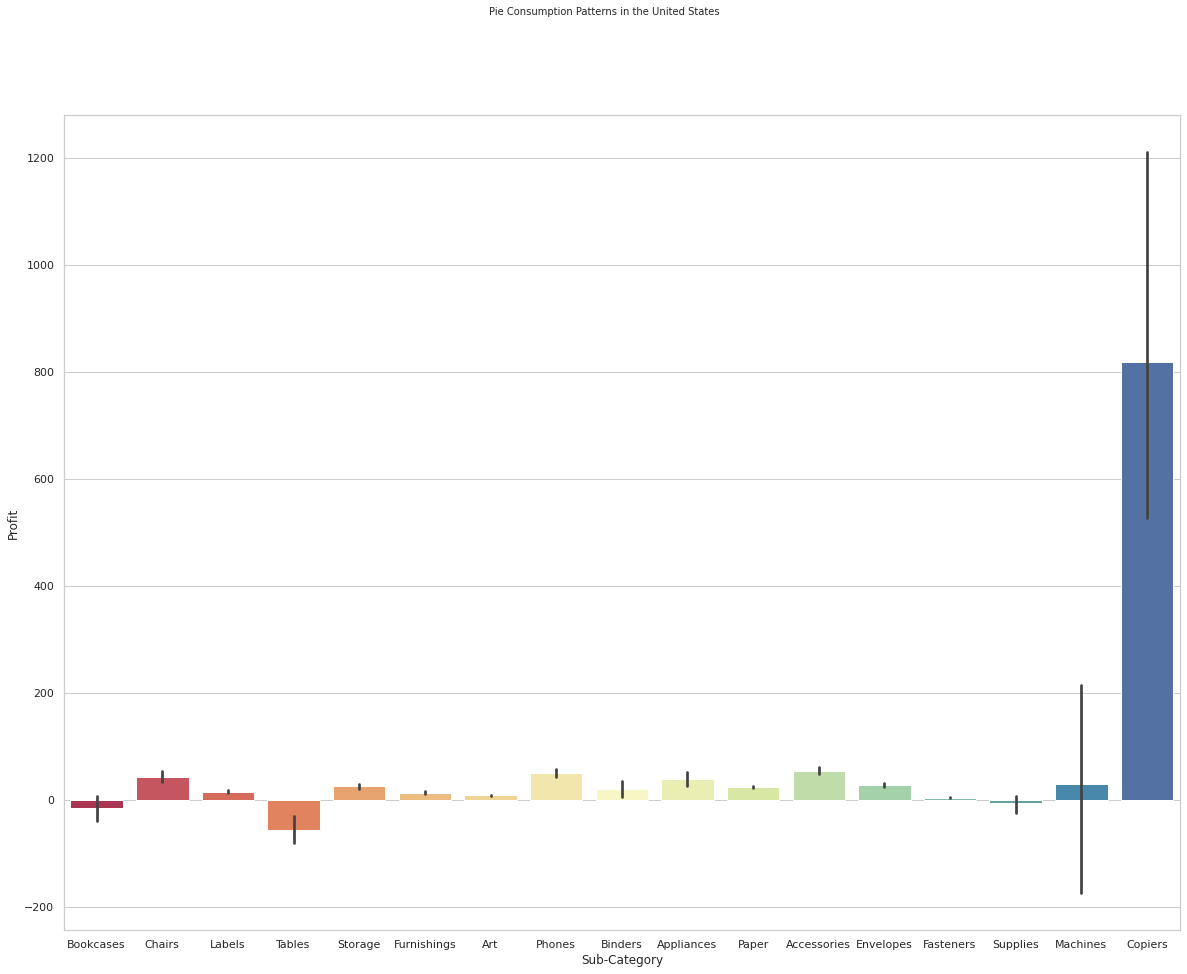

In [ ]:
sns.set(style="whitegrid")
plt.figure(2,figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit',data=sample,palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States',fontsize=10)
plt.show()

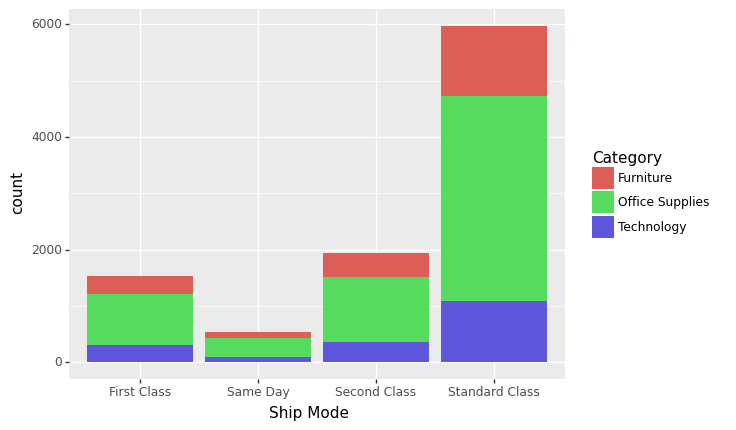

<ggplot: (8731173122597)>

In [ ]:
ggplot(sample,aes(x='Ship Mode',fill='Category')) + geom_bar(stat = 
                                                             'count')

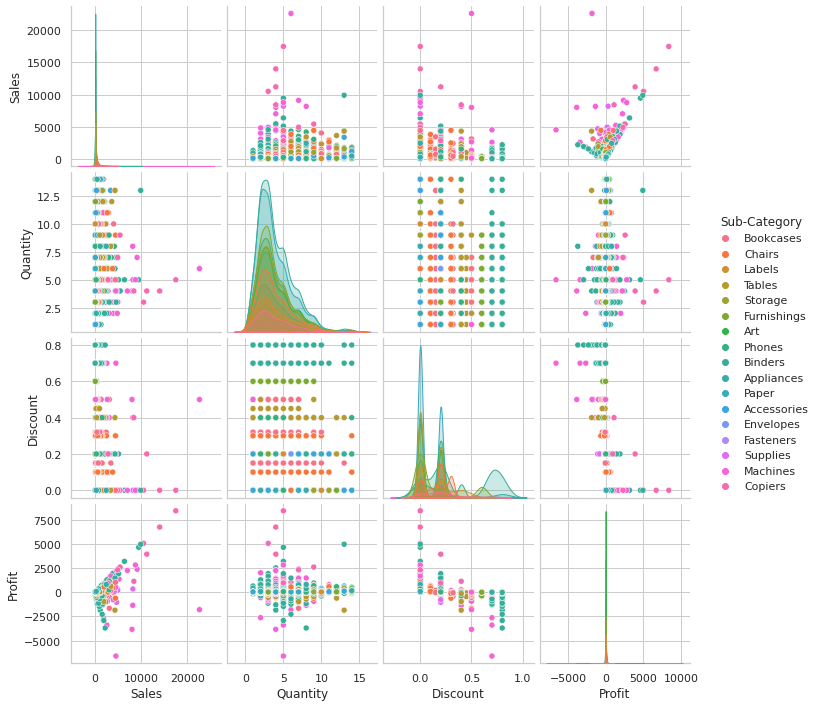

In [ ]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')
plt.show()

From the above plot we can say tht our data is not normal and it has some amount of outliers too..Let's explore more about these outliers by using the boxplots.

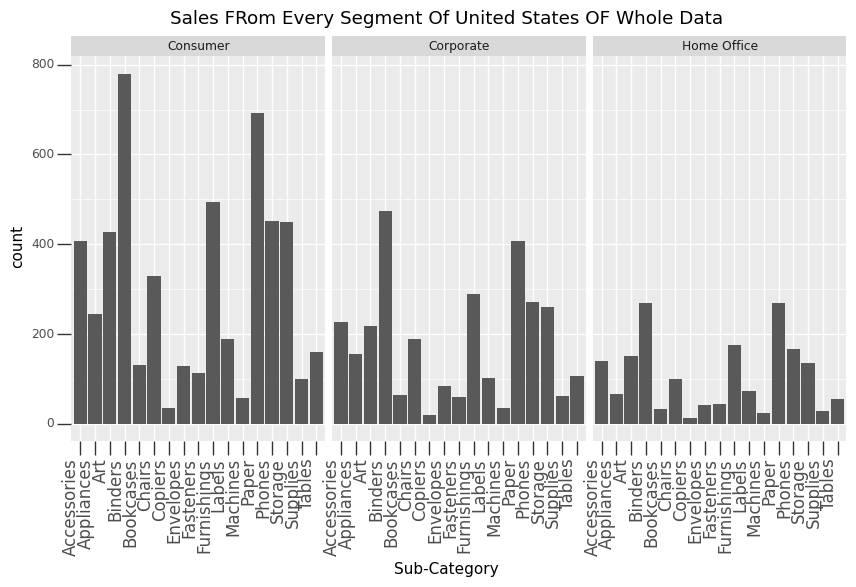

<ggplot: (8731169476669)>

In [ ]:
flip_xlabels= theme(axis_text_x = element_text(angle =90,hjust=1),figure_size=(10,5),
                    axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category',fill='Sales')) + geom_bar() +  facet_wrap(['Segment'])
+ flip_xlabels + theme(axis_text_x = element_text(size=12))+ ggtitle("Sales FRom Every Segment Of United States OF Whole Data"))


From the above graph we can say that "Home-Office" has less purchased  sub-categories.

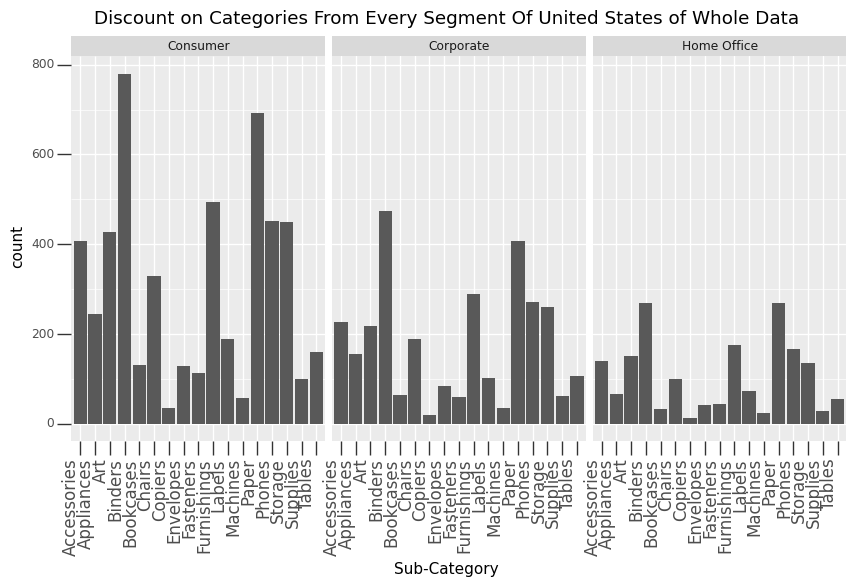

<ggplot: (8731173099557)>

In [ ]:
flip_xlabels= theme(axis_text_x= element_text(angle =90,hjust=1),figure_size=(10,5),
                    axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample,aes(x='Sub-Category',fill='Discount')) + geom_bar() +  facet_wrap(['Segment'])
+ flip_xlabels + theme(axis_text_x = element_text(size=12))+ ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

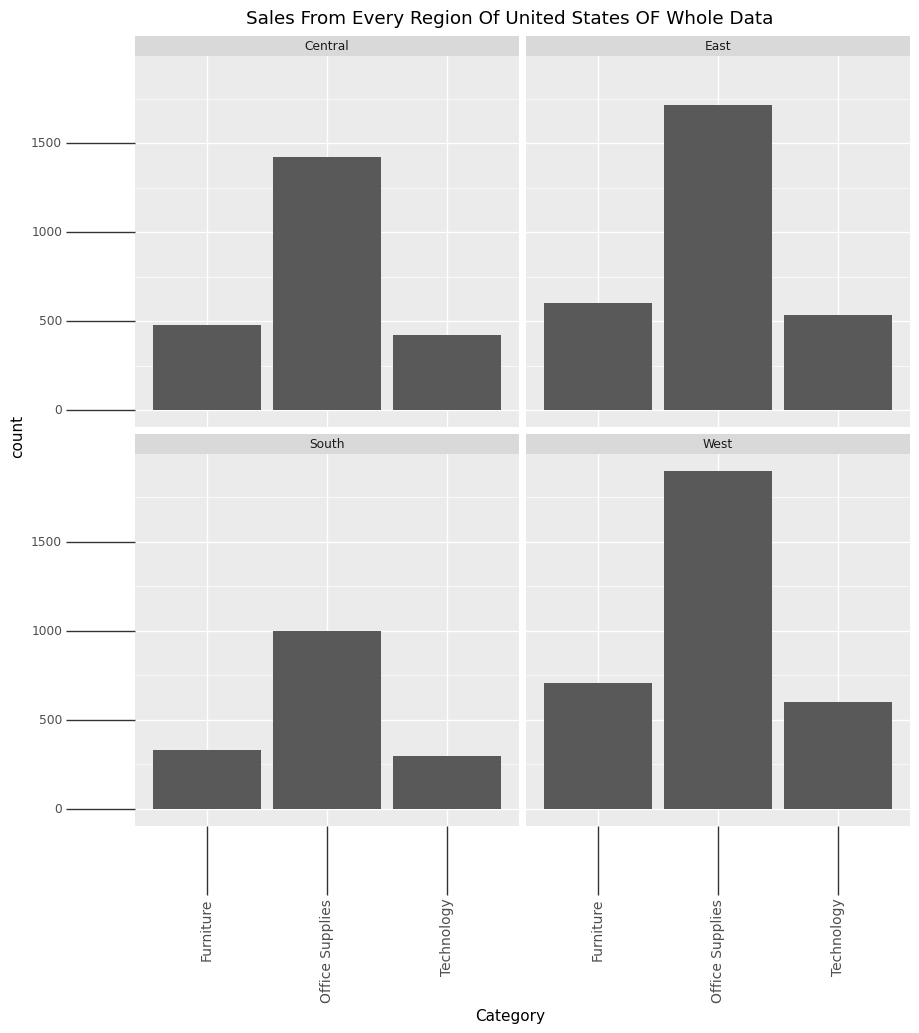

<ggplot: (8731175876413)>

In [ ]:
flip_xlabels= theme(axis_text_x = element_text(angle =90,hjust=10),figure_size=(10,10),
                    axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample1,aes(x='Category',fill='Sales')) + geom_bar() + theme(axis_text_x =element_text(size=10))
+ facet_wrap(['Region']) + flip_xlabels     + ggtitle("Sales From Every Region Of United States OF Whole Data"))

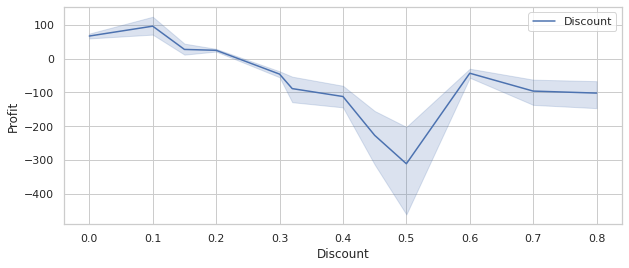

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data =sample1,label = 'Discount')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
pip install plotly

In [ ]:
state_code = {'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'} 
sample1['state_code'] = sample1.State.apply(lambda x: state_code)

In [ ]:
state_data =sample1[['Sales','Profit','state_code']]
fig = go.Figure(data =go.Choropleth(
    locations = state_data.index,
    z =state_data.Sales,
    locationmode='USA-states',
    colorscale ='Reds',
    colorbar_title ='Sales in USD',
))

fig.update_layout(
    title_text ='Total State-Wise Sales',
        height=800,)
fig.show()

In [ ]:
def state_data_viewer(states):
  """Plots the turnover generated by different product categories and sub-categories from the list of given states.
  Args:
       states-List of all the statesyou want to plots for
  Returns:
  None
  """
  product_data = sample1.groupby(['State'])
  for state in states:
    data =  product_data.get_group(state).groupby(['Category'])
    fig,ax =plt.subplots(1,3,figsize=(28,5))
    fig.suptitle(state,fontsize =14)
    ax_index = 0
    for cat in ['Furniture','Office Supplies','Technology']:
      cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
      sns.barplot(x = cat_data.Profit, y =cat_data.index,ax = ax[ax_index])
      ax[ax_index].set_ylabel(cat)
      ax_index  +=1
    fig.show()


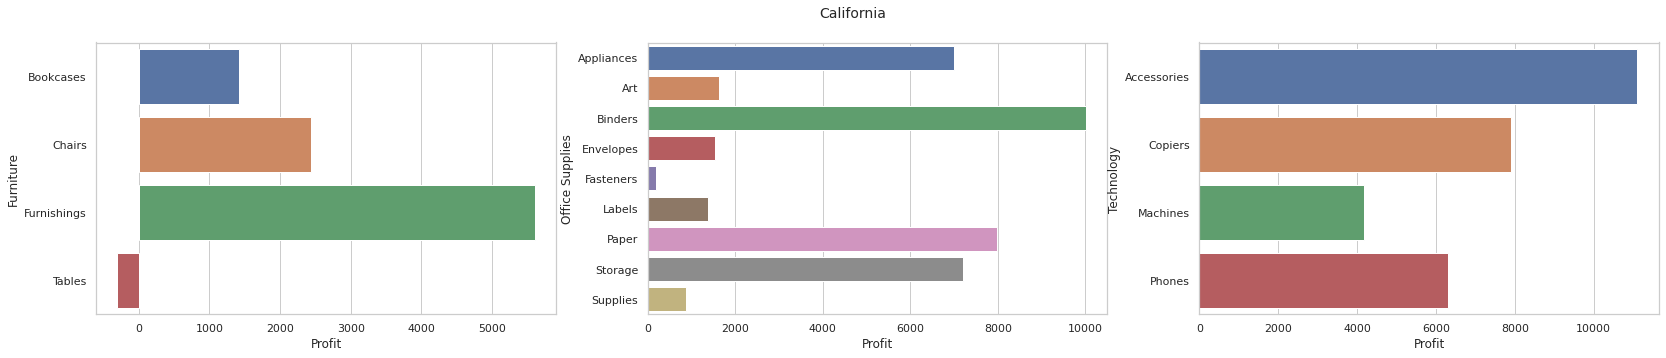

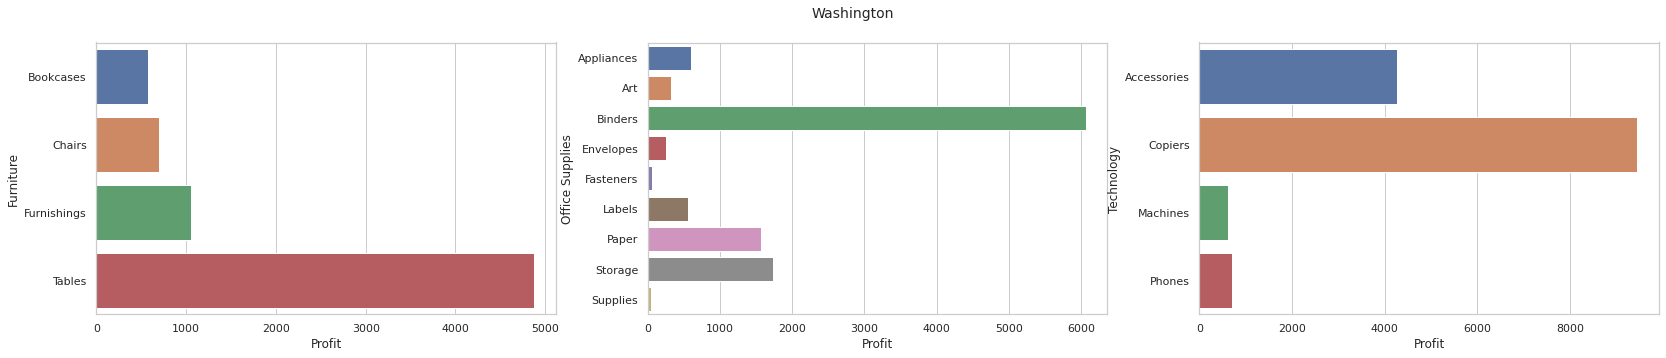

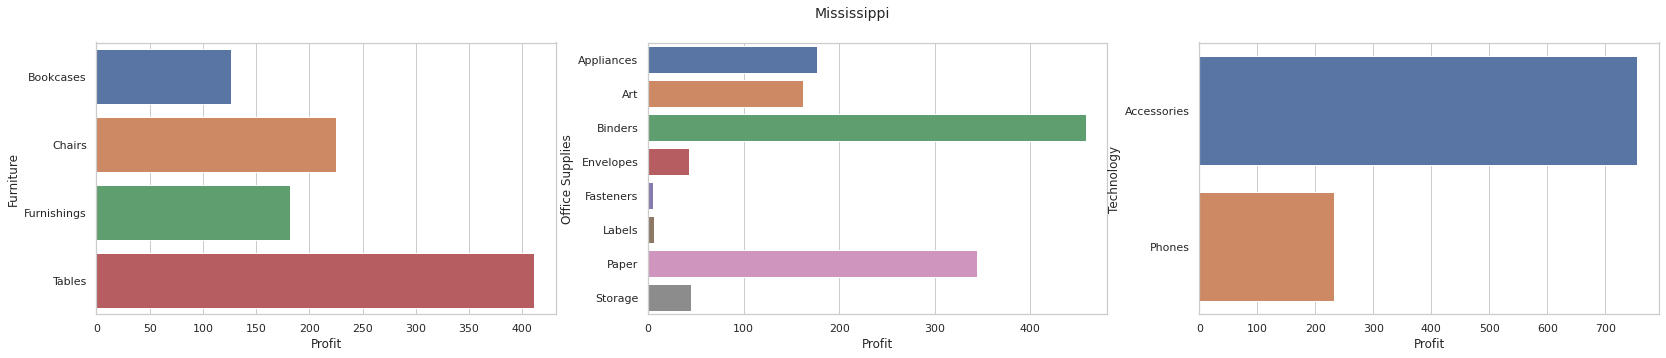

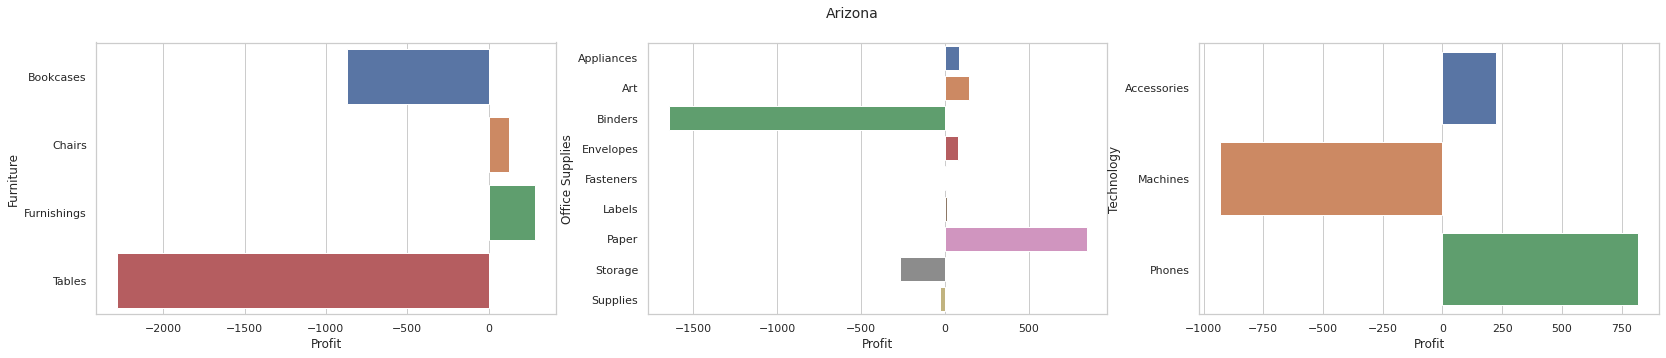

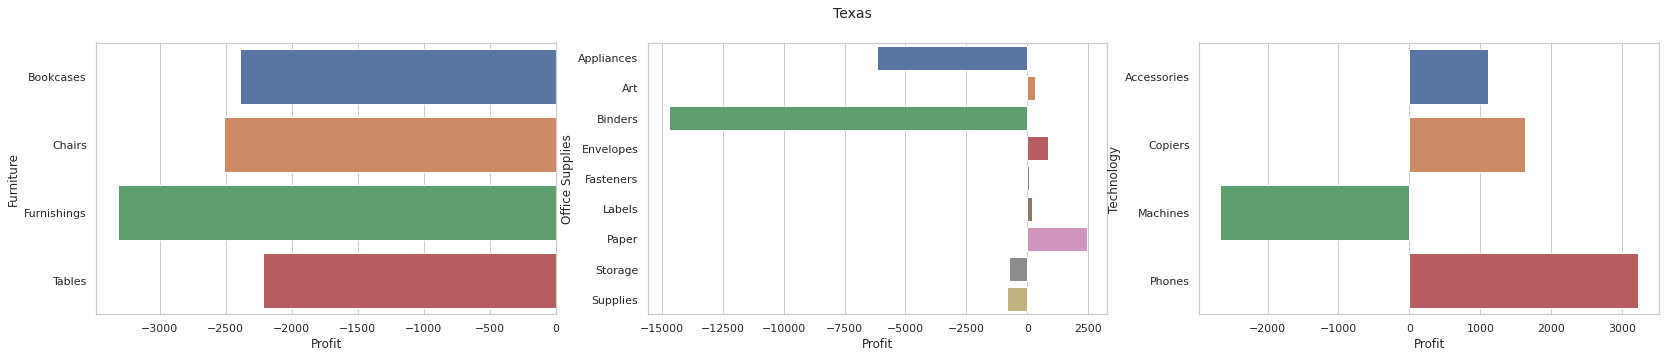

In [ ]:
states = ['California','Washington','Mississippi','Arizona','Texas']
state_data_viewer(states)

From the above data visualization,we can see the states where sales and profits are both high and less.